## Observations and Insights 

In [307]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = study_data_complete[study_data_complete.duplicated(subset=["Mouse ID","Timepoint"])]["Mouse ID"].unique()
#assign variable
duplicate_mouse

print(duplicate_mouse[0])



g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = study_data_complete[study_data_complete.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = study_data_complete.drop(study_data_complete.loc[study_data_complete["Mouse ID"]==duplicate_mouse[0]].index, inplace=False)
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

regimen = clean_data_df["Drug Regimen"].unique()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

new_df = clean_data_df.groupby(["Drug Regimen"])

tv_mean = new_df["Tumor Volume (mm3)"].mean()
tv_median = new_df["Tumor Volume (mm3)"].median()
tv_variance = new_df["Tumor Volume (mm3)"].var()
tv_std = new_df["Tumor Volume (mm3)"].std()
tv_sem = new_df["Tumor Volume (mm3)"].sem()

regimen_df = pd.DataFrame({"Mean Tumor Volume":tv_mean,
                 "Median Tumor Volume":tv_median,
                 "Tumor Volume Variance":tv_variance,
                 "Tumor Volume Std Dev":tv_std,
                 "Tumor Volume Std. Err":tv_sem})
regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_new_df = new_df.agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
agg_new_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

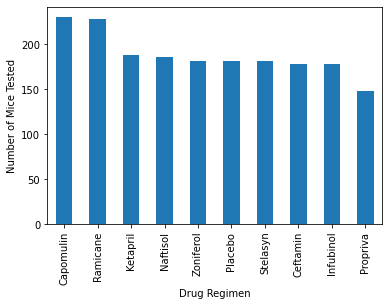

In [137]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_new_df = new_df["Mouse ID"].count().sort_values(ascending=False).plot(kind='bar',rot=90);
bar_new_df.set_ylabel("Number of Mice Tested");




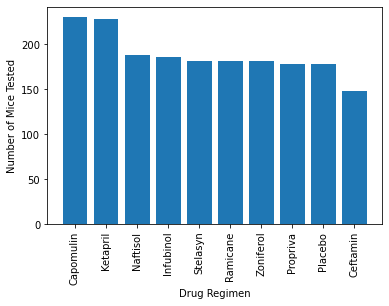

In [134]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(regimen, new_df["Mouse ID"].count().sort_values(ascending=False));
plt.xlabel("Drug Regimen");
plt.ylabel("Number of Mice Tested");
plt.xticks(rotation=90);


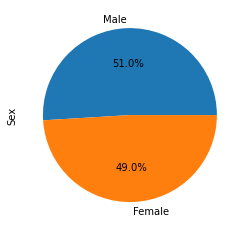

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


sex_count_df = clean_data_df.groupby(["Sex"]).count()
new_name_df = sex_count_df.rename(columns={"Mouse ID":"Sex"})
pie_chart = new_name_df["Sex"].sort_values(ascending=False).plot(kind="pie",rot=180,autopct='%1.1f%%')


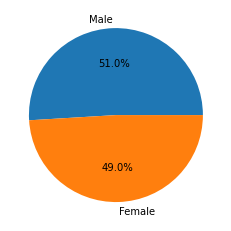

In [231]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_df = clean_data_df.groupby(["Sex"]).count()
count_of_sex = sex_df["Mouse ID"].tolist()

count_of_sex.sort(reverse=True)

sex = clean_data_df["Sex"].unique()
sorted_sex = sex[::-1]
plt.pie(count_of_sex, labels=sorted_sex, autopct="%1.1f%%");


## Quartiles, Outliers and Boxplots

In [269]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse

mouse_id_df = clean_data_df.groupby('Mouse ID')
max_timepoint_df = mouse_id_df['Timepoint'].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_vol_df = pd.merge(max_timepoint_df,clean_data_df,on=['Mouse ID','Timepoint'],how='left')

volumes = final_vol_df['Tumor Volume (mm3)']

drugs_df = final_vol_df.loc[(final_vol_df['Drug Regimen'] == 'Capomulin')|
        (final_vol_df['Drug Regimen'] == 'Ramicane')|
        (final_vol_df['Drug Regimen'] =='Infubinol')|
        (final_vol_df['Drug Regimen'] =='Ceftamin'),:]
drugs_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [322]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tv_data = []
drug_outliers = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_drugs = final_vol_df.loc[(final_vol_df["Drug Regimen"] == drug)]

    # add subset 
    tv_data.append(filtered_drugs["Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds
    quartiles = filtered_drugs["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    drug_outliers = filtered_drugs.loc[
        (filtered_drugs["Tumor Volume (mm3)"] < lower_bound) |
        (filtered_drugs["Tumor Volume (mm3)"] > upper_bound)]
    min_vol = filtered_drugs["Tumor Volume (mm3)"].min()
    print(f'The outliers for {drug} are: {drug_outliers}')
    

The outliers for Capomulin are: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
The outliers for Ramicane are: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
The outliers for Infubinol are:    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
31     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
31  Female          18          25  
The outliers for Ceftamin are: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


<ipython-input-296-51bbe1409ee2>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_list);


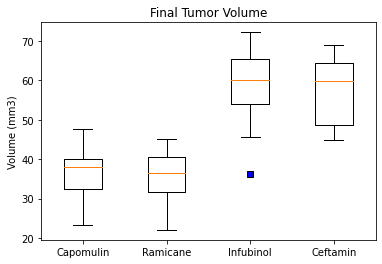

In [296]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume');
ax1.set_ylabel('Volume (mm3)');
ax1.set_xticklabels(drug_list);
blue_square = dict(markerfacecolor='b',marker='s');
ax1.boxplot(tv_data,flierprops=blue_square);

plt.show()

## Line and Scatter Plots

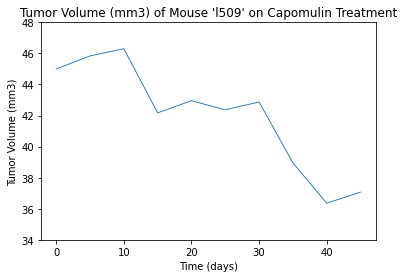

In [301]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = clean_data_df.loc[clean_data_df['Mouse ID'] == 'l509']
mouse_time = mouse_df['Timepoint']
mouse_volume = mouse_df['Tumor Volume (mm3)']

plt.plot(mouse_time,g288_volume,linewidth=0.9)
plt.title("Tumor Volume (mm3) of Mouse 'l509' on Capomulin Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(34,48)
plt.show()

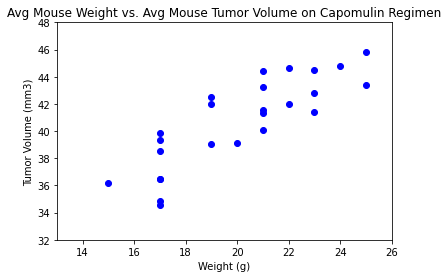

In [303]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
capomulin_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Capomulin")]
capomulin_avgs = capomulin_df.groupby(["Mouse ID"]).mean()


weight = capomulin_avgs["Weight (g)"]
volume = capomulin_avgs["Tumor Volume (mm3)""]

marker_size = 10
plt.scatter(weight,volume,color="blue")
plt.title("Avg Mouse Weight vs. Avg Mouse Tumor Volume on Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(13,26)
plt.ylim(32,48)
plt.show()

## Correlation and Regression

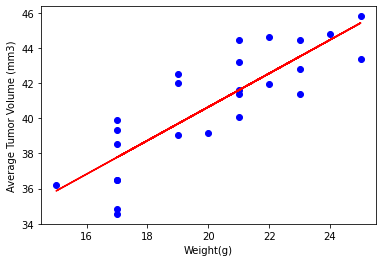

In [318]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


correlation = round(st.pearsonr(weight,volume)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,volume);
regression_values = weight * slope + intercept
slope_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,volume,color="blue");
plt.plot(weight,regression_values,"r-");
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)");
